# Long-Short Term Memory


Original Dataset: [Yahoo Finance](https://finance.yahoo.com/quote/BTC-USD/)

## 1. Imports

In [ ]:
# Library imports

# General Purpose
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Preprocessing and evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

# Model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

# Graphs and charts
import plotly.express as px
from plotly.subplots import make_subplots

## 2. Loading Dataset

Bitcoin prices from 17th of September 2014 to 29th of February 2024.

Use the dataset from our [Github](https://github.com/Pelatihan-Time-Series-IMV-2024/Time-Series-Forecasting/blob/main/datasets/BTC-USD(290224).csv) to make sure you are using the correct file.

In [ ]:
url = "https://raw.githubusercontent.com/Pelatihan-Forecasting-IMV-2024/Time-Series-Forecasting/main/datasets/BTC-USD(310524).csv?token=GHSAT0AAAAAACS2SYFZC57OSRY75XSCHPVQZTBI6GA"
df = pd.read_csv(url) # Load the dataset as a pandas dataframe called df

In [ ]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  3545
Number of columns:  7


In [ ]:
df.head(10) # Print the first 10 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [ ]:
df.tail(10) # Print the last 10 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
3535,2024-05-22,70135.320313,70623.695313,68977.695313,69122.335938,69122.335938,32802561717
3536,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,67929.562500,41895680979
3537,2024-05-24,67928.132813,69220.296875,66622.671875,68526.101563,68526.101563,29197308153
3538,2024-05-25,68526.921875,69579.320313,68515.820313,69265.945313,69265.945313,15473071741
3539,2024-05-26,69264.289063,69506.226563,68183.890625,68518.093750,68518.093750,15628433737
3540,2024-05-27,68512.179688,70597.882813,68232.500000,69394.554688,69394.554688,25870990717
3541,2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
3542,2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
3543,2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534
3544,2024-05-31,68362.515625,68999.562500,66633.421875,67491.414063,67491.414063,27387283769


In [ ]:
df.info() # Print informations about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3545 non-null   object 
 1   Open       3545 non-null   float64
 2   High       3545 non-null   float64
 3   Low        3545 non-null   float64
 4   Close      3545 non-null   float64
 5   Adj Close  3545 non-null   float64
 6   Volume     3545 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 194.0+ KB


In [ ]:
df.describe() # Print facts about the dataset

,Open,High,Low,Close,Adj Close,Volume
count,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3.545000e+03
mean,16443.754165,16825.593503,16036.520756,16461.428996,16461.428996,1.724799e+10
std,18272.568647,18702.634235,17800.527797,18288.402841,18288.402841,1.923339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1040.140015,1056.810059,1020.039978,1039.969971,1039.969971,2.290570e+08
50%,8788.728516,8958.122070,8577.199219,8790.919922,8790.919922,1.312571e+10
75%,27235.650391,27725.953125,26814.585938,27249.589844,27249.589844,2.783388e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


### More information about the dataset

The dataset provided by Yahoo Finance tells us about the fluctuation stock price of Bitcoin.


Bitcoin is a type of cryptocurrency popular for being one of the first ever created. Bitcoin gained its current pricing not out of the blue but for many things, most importantly its limited supply. You can read more about Bitcoin [here](https://www.investopedia.com/terms/b/bitcoin.asp), [here](https://www.coinbase.com/learn/crypto-basics/what-is-bitcoin), or [here](https://www.investopedia.com/ask/answers/100314/why-do-bitcoins-have-value.asp).


This dataset consist of seven columns, ranging from 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. Since the dataset is indexed each day since 17th of Septermber 2014, we will be refering everything in days.

|Column|Meaning|
|---|---|
|Date|The date of the stock market|
|Open|The initial price of trades in the current day|
|High|The highest price traded on a single day|
|Low|The lowest prices traded on a single day|
|Close|The closing price of trades in the current day|
|Adj Close|Close price after a market adjustment|
|Volume|The number of trades that happen on that day|

## 3. Data Preprocessing

Check for any inconsistentcies, missing values, or any other defects in the dataset.

In [ ]:
print('Null Values:', df.isnull().values.sum())

Null Values: 0


In [ ]:
# # If a null value is present inside the dataset, run the code below

# df = df.fillna(method = 'ffill') # This method fill the missing value with the value on the previous row

# print('Null Values:', df.isnull().values.sum())

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Since we are predicting the future value of Bitcoin, it is recommended to predict the 'Close' price. But it is possible to predict every price you want. We do not need 'Adj Close' because it has the same value as 'Close', and we also do not need 'Volume' because we will only be predicting prices.

In [ ]:
df.drop(df[['Adj Close', 'Volume']], axis = 1, inplace = True) # The .drop method deletes the corresponding columns
df.head()

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014


In [ ]:
# On the previous df.info() we can see that 'Date' is an object,
# we must convert this to datetime in order to plot our dataset much more easily

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3545 non-null   datetime64[ns]
 1   Open    3545 non-null   float64       
 2   High    3545 non-null   float64       
 3   Low     3545 non-null   float64       
 4   Close   3545 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 138.6 KB


## 4. Exploratory Data Analysis

In [ ]:
names = ['BTC Open Price', 'BTC Close Price', 'BTC High Price', 'BTC Low Price']

fig = px.line(df, x=df['Date'],
              y=[df['Open'], df['Close'],
                 df['High'], df['Low']],
              labels={'Date': 'Date', 'value': 'BTC Value (USD)'})  # We will be using plotly express to create an interactive plot

fig.update_layout(title_text='BTC Analysis Chart', font_size=15, font_color='black', legend_title_text='Legend')

for i, trace in enumerate(fig.data):
    trace.name = names[i]

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


Let's extract the 'Close' price to streamline our focus on prediction.

In [ ]:
closedf = df[['Date','Close']] # Create a new dataframe called closedf, ONLY extract 'Date' and 'Close'
print("Bentuk dari tabel close:", closedf.shape) # Prints the shape of the dataframe

Bentuk dari tabel close: (3545, 2)


In [ ]:
fig = px.line(closedf, x=closedf['Date'], y=closedf['Close'],labels={'date':'Date','close':'Close Stock'})

fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')

fig.update_layout(title_text='BTC Close Price 2014-2024', plot_bgcolor='white',
                  font_size=15, font_color='black')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Since the Bitcoin graph is full of peaks and valleys, we can't use all of the data for the prediction. If used, the prediction will be not ideal. So let's shrink our data to only a year of Bitcoin price.

## 5. Training

In [ ]:
closedf = closedf.loc[(closedf['Date'] >= '2023-04-01') & (closedf['Date'] <= '2024-04-01')]
# Since our dataset is printed at 6th June 2024, since June is still starting,
# we'll be looking at our data only in May, since last year,
# so let's extract the data from the 1st of May, last year, until 31st of May.

close_stock = closedf.copy()
print("Total data for training: ", closedf.shape[0])

Total data for training:  367


In [ ]:
fig = px.line(closedf, x=closedf['Date'], y=closedf['Close'],labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Periode to Predict BTC Close Price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show() # Show the figure

In [ ]:
# After exploring our dataset, we no longer need 'Date' column for training

closedf.drop('Date',axis = 1, inplace = True)

In [ ]:
# If we train our dataset right away, it will overfit, so let's normalize it using a scaler

scaler = MinMaxScaler(feature_range=(0,1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1,1))  # Reshape the dataframe
print(closedf) # Our data should be normalized with its lowest value being 0, and highest being 1

[[6.85246027e-02]
 [6.41098455e-02]
 [5.55798639e-02]
 [6.34588965e-02]
 [6.36652096e-02]
 [6.08744041e-02]
 [5.84080957e-02]
 [5.88654786e-02]
 [6.68985333e-02]
 [9.44206778e-02]
 [1.06557717e-01]
 [1.04555878e-01]
 [1.09977480e-01]
 [1.11783880e-01]
 [1.08297491e-01]
 [1.08232005e-01]
 [9.00849679e-02]
 [1.09945918e-01]
 [7.71078934e-02]
 [6.50831740e-02]
 [4.48767127e-02]
 [5.61486705e-02]
 [5.14338920e-02]
 [5.00567748e-02]
 [6.63678046e-02]
 [6.87678534e-02]
 [9.06842776e-02]
 [8.79001103e-02]
 [8.59865221e-02]
 [8.64101847e-02]
 [6.18633302e-02]
 [7.41440472e-02]
 [8.09367802e-02]
 [7.76298255e-02]
 [9.19478127e-02]
 [7.88165124e-02]
 [6.94408754e-02]
 [5.35792463e-02]
 [5.28390687e-02]
 [5.20671663e-02]
 [3.91192510e-02]
 [3.50366065e-02]
 [3.46005635e-02]
 [3.76565298e-02]
 [4.31206897e-02]
 [3.98670034e-02]
 [4.74183217e-02]
 [3.56041507e-02]
 [3.68118517e-02]
 [4.18048230e-02]
 [3.39697734e-02]
 [3.60017492e-02]
 [4.38094723e-02]
 [2.52329493e-02]
 [2.81810756e-02]
 [3.324967

In [ ]:
# This cell splits between training data and test data

training_size = int(len(closedf) * 0.70) # Declare your own percentage
test_size = len(closedf)-training_size
train_data,test_data = closedf[0:training_size,:], closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (256, 1)
test_data:  (111, 1)


In [ ]:
# This further splits between x and y

time_step = 20 # This variable declare the time step between every data, trial and error works best

# Training data
X_train, y_train = [], []
for i in range(len(train_data) - time_step - 1):
    a = train_data[i:(i + time_step), 0]
    X_train.append(a)
    y_train.append(train_data[i + time_step, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Testing data
X_test, y_test = [], []
for i in range(len(test_data) - time_step - 1):
    a = test_data[i:(i + time_step), 0]
    X_test.append(a)
    y_test.append(test_data[i + time_step, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (235, 20)
y_train:  (235,)
X_test:  (90, 20)
y_test (90,)


In [ ]:
# This process adds a dimension using reshape

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (235, 20, 1)
X_test:  (90, 20, 1)


In [ ]:
# Using tensorflow, we can create a LSTM network

model=Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # The LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # The LSTM layer

# You can add as many layer as you want, but remember that quantity does not always results in quality

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))

model.add(Dropout(0.1)) # This layer deactivate some neurons from activating

model.add(Dense(25)) # The layer that receives input from all neurons from the previous layer
model.add(Dense(1)) # Like the layer above it, but this one is specialized in outputing the result

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
# Using .fit method, we begin training on our dataset

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=2, verbose=1)

Epoch 1/50
118/118 [==============================] - 14s 60ms/step - loss: 0.0033 - val_loss: 0.1170
Epoch 2/50
118/118 [==============================] - 3s 29ms/step - loss: 0.0019 - val_loss: 0.1043
Epoch 3/50
118/118 [==============================] - 3s 29ms/step - loss: 0.0022 - val_loss: 0.2031
Epoch 4/50
118/118 [==============================] - 5s 39ms/step - loss: 0.0021 - val_loss: 0.0757
Epoch 5/50
118/118 [==============================] - 3s 29ms/step - loss: 0.0018 - val_loss: 0.0692
Epoch 6/50
118/118 [==============================] - 3s 29ms/step - loss: 0.0013 - val_loss: 0.0105
Epoch 7/50
118/118 [==============================] - 4s 35ms/step - loss: 9.9899e-04 - val_loss: 0.0485
Epoch 8/50
118/118 [==============================] - 4s 33ms/step - loss: 9.7093e-04 - val_loss: 0.0918
Epoch 9/50
118/118 [==============================] - 3s 29ms/step - loss: 0.0010 - val_loss: 0.0517
Epoch 10/50
118/118 [==============================] - 3s 29ms/step - loss: 7.9522

## 6. Evaluation

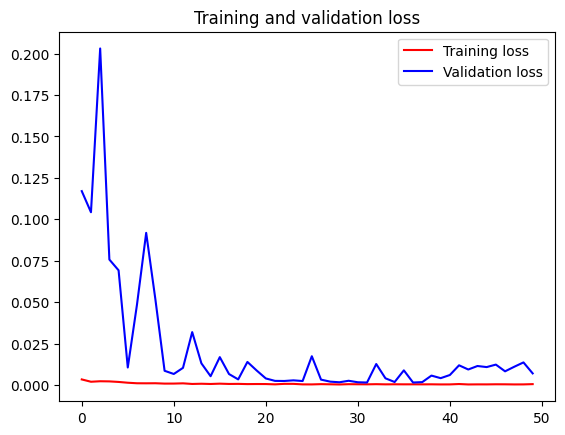

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plots evaluation metrics

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show() # Show the plot

In [ ]:
train_predict=model.predict(X_train) # The train dataset
test_predict=model.predict(X_test) # The validation/test dataset

train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 12ms/step


((235, 1), (90, 1))

In [ ]:
# This cell basically reverts your datasets back to its original values, that being Bitcoin prices

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict))) # The average error squared, go figure
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict)) # The average error squared, go figure
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict)) # The average absolute error, go figure

Train data RMSE:  800.1913522621676
Train data MSE:  640306.2002351565
Train data MAE:  600.6581616345743


In [ ]:
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict))) # The average error squared, go figure
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict)) # The average error squared, go figure
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict)) # The average absolute error, go figure

Test data RMSE:  4000.3390257750843
Test data MSE:  16002712.32113915
Test data MAE:  3058.1869359


In [ ]:
look_back = time_step  # Assuming you have 'time_step' defined earlier

trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(closedf) - 1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = ['Original close price', 'Train predicted close price', 'Test predicted close price']

plotdf = pd.DataFrame({
    'date': close_stock['Date'],
    'original_close': close_stock['Close'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
    'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()
})

fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'], plotdf['train_predicted_close'],
                                           plotdf['test_predicted_close']],
              labels={'value': 'Stock price', 'date': 'Date'})
fig.update_layout(title_text='Comparison between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')

for i, trace in enumerate(fig.data):
    trace.name = names[i]

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (367, 1)
Test predicted data:  (367, 1)


## 7. Prediction

This section focuses on predicting future values

In [ ]:
# Creates a new array with the previous 30 days of data

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50]


In [ ]:
last_original_days_value = np.empty((len(last_days) + pred_days + 1, 1))
last_original_days_value[:] = np.nan
last_original_days_value = last_original_days_value.reshape(1, -1).tolist()[0]

next_predicted_days_value = np.empty((len(last_days) + pred_days + 1, 1))
next_predicted_days_value[:] = np.nan
next_predicted_days_value = next_predicted_days_value.reshape(1, -1).tolist()[0]

last_original_days_value[0:time_step + 1] = scaler.inverse_transform(closedf[len(closedf) - time_step:]).reshape(1, -1).tolist()[0]
next_predicted_days_value[time_step + 1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0][1:]

new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value[:-1],  # Adjust the length
    'next_predicted_days_value': next_predicted_days_value[:-1]  # Adjust the length
})

names = ['Last 15 days close price', 'Predicted next 30 days close price']

fig = px.line(new_pred_plot, x=new_pred_plot.index,
              y=[new_pred_plot['last_original_days_value'], new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price', 'index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')

for i, trace in enumerate(fig.data):
    trace.name = names[i]

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf = closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1, 1)).tolist())
lstmdf = scaler.inverse_transform(lstmdf).reshape(1, -1).tolist()[0]

names = ['Close price']

fig = px.line(lstmdf, labels={'value': 'Stock price', 'index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')

for i, trace in enumerate(fig.data):
    trace.name = names[i]

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Now, can we apply the same prediction methods with [this](https://github.com/Pelatihan-Forecasting-IMV-2024/Time-Series-Forecasting/blob/main/datasets/ETH-USD(290224).csv) dataset?

In [ ]:
last_60_days = closedf[-60:]

In [ ]:
last_60_days

array([[0.37659771],
       [0.37256072],
       [0.3640395 ],
       [0.36560513],
       [0.37448783],
       [0.40020887],
       [0.42071279],
       [0.45919648],
       [0.47220927],
       [0.48310697],
       [0.51780975],
       [0.51331045],
       [0.55676969],
       [0.55910209],
       [0.56372373],
       [0.55335636],
       [0.56293855],
       [0.55577819],
       [0.56632329],
       [0.55703   ],
       [0.54589113],
       [0.53394289],
       [0.55144025],
       [0.55482099],
       [0.61297847],
       [0.66641949],
       [0.77942097],
       [0.75218081],
       [0.77808323],
       [0.76951786],
       [0.79323661],
       [0.90089236],
       [0.8064527 ],
       [0.85452739],
       [0.87159786],
       [0.90026014],
       [0.90440514],
       [0.91526667],
       [0.9799913 ],
       [0.96659195],
       [1.        ],
       [0.96482595],
       [0.92327321],
       [0.83801974],
       [0.90214783],
       [0.88459045],
       [0.76707672],
       [0.892

In [ ]:
new_X_test = []
new_X_test.append(last_60_days)

In [ ]:
new_X_test = np.array(new_X_test)

In [ ]:
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))

In [ ]:
pred_price = model.predict(new_X_test)

1/1 [==============================] - 3s 3s/step


In [ ]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[63934.402]]
